In [1]:
import gravipy
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import lambdify
from sympy.abc import a,b,c,d
from scipy.integrate import odeint
%matplotlib inline
gravipy.init_printing()

In [2]:
t, r,theta,phi,tau = gravipy.symbols('t r \\theta \phi \\tau')

In [3]:
m=5
x = gravipy.Coordinates('\chi', [t, r, theta, phi])
Metric = gravipy.diag(-(1-2*m/r), 1/(1-2*m/r), r**2, r**2*gravipy.sin(theta)**2)
Metric2D = gravipy.diag(-(1-2*m/r), 1/(1-2*m/r), r**2, r**2)
Metric_weak = gravipy.diag(-(1+2*m/r), (1+2*m/r), (1+2*m/r), (1+2*m/r))

In [4]:
g = gravipy.MetricTensor('g', x, Metric2D)


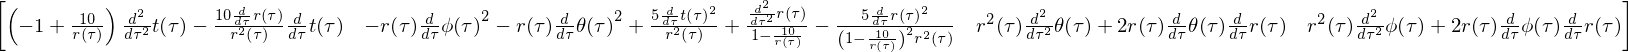

In [5]:
w = gravipy.Geodesic('w', g, tau)
w(gravipy.All)

In [6]:
d2t = sympy.solve(w(1),sympy.Derivative(t(tau),tau,tau))[0].subs({sympy.Derivative(t(tau),tau):a,sympy.Derivative(r(tau),tau):b,sympy.Derivative(phi(tau),tau):c,sympy.Derivative(theta(tau),tau):d})
d2r = sympy.solve(w(2),sympy.Derivative(r(tau),tau,tau))[0].subs({sympy.Derivative(t(tau),tau):a,sympy.Derivative(r(tau),tau):b,sympy.Derivative(phi(tau),tau):c,sympy.Derivative(theta(tau),tau):d})
d2theta = sympy.solve(w(3),sympy.Derivative(theta(tau),tau,tau))[0].subs({sympy.Derivative(t(tau),tau):a,sympy.Derivative(r(tau),tau):b,sympy.Derivative(phi(tau),tau):c,sympy.Derivative(theta(tau),tau):d})
d2phi = sympy.solve(w(4),sympy.Derivative(phi(tau),tau,tau))[0].subs({sympy.Derivative(t(tau),tau):a,sympy.Derivative(r(tau),tau):b,sympy.Derivative(phi(tau),tau):c,sympy.Derivative(theta(tau),tau):d})

In [7]:
d2tf = lambdify((a,b,c,d,t(tau),r(tau),theta(tau),phi(tau)),d2t,modules="numpy")
d2rf = lambdify((a,b,c,d,t(tau),r(tau),theta(tau),phi(tau)),d2r,modules="numpy")
d2thetaf = lambdify((a,b,c,d,t(tau),r(tau),theta(tau),phi(tau)),d2theta,modules="numpy")
d2phif = lambdify((a,b,c,d,t(tau),r(tau),theta(tau),phi(tau)),d2phi,modules="numpy")

In [8]:
print d2tf(1,2,3,4,5,6,7,8)
print d2rf(1,2,3,4,5,6,7,8)
print d2thetaf(1,2,3,4,5,6,7,8)
print d2phif(1,2,3,4,5,6,7,8)

0.833333333333
-100.740740741
-2.66666666667
-2.0


In [9]:
def geo(x, tau):
    dxdtau = np.zeros_like(x)
    dxdtau[0] = x[4]
    dxdtau[1] = x[5]
    dxdtau[2] = x[6]
    dxdtau[3] = x[7]
    dxdtau[4] = d2tf(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7])
    dxdtau[5] = d2rf(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7])
    dxdtau[6] = d2thetaf(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7])
    dxdtau[7] = d2phif(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7])
    return dxdtau

In [25]:
tau = np.arange(0,10,.1)
x0_ = np.array([1,2,0,4,5,6,0,6])
x_ = odeint(geo, x0_, tau)

In [26]:
#print x_

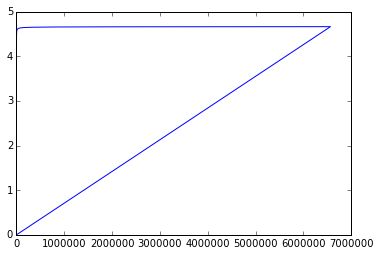

In [27]:
plt.plot(x_[:,0],x_[:,1])
